<a href="https://www.kaggle.com/code/aisuko/rectified-linear-unit-relu?scriptVersionId=164534862" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Overview

The Rectified Linear Unit(ReLU) is a popular activation function used in neural networks and deep learning models. The function returns 0 if it receives any negative input, but for any positive value `x` it returns that value back. It can be mathematically represented as:

```
f(x)=max(0,x)
```

# Implementation

Here we use `numpy` libary to implement it. `relu` is a functiom that takes a numpy array `x` and returns a new array where negative values are replaced with 0. The `np.maximum` function is used to apply this operation element-wise to the array.

In [1]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

x=np.array([-2,-1,0,1,2])
print(relu(x))

[0 0 0 1 2]


# Difference between ReLU and [GELU](https://www.kaggle.com/code/aisuko/gaussian-error-linear-unit-gelu)

ReLU stands for Rectified Linear Unit and GELU stands for Gaussian Error Linear Unit are both activation functions used in neural networks, but they have different mathematical forms and properties:

# ReLU

The ReLU function is defined as 

```f(x)=max(0,x)```

It's very simple and computationally efficient. ReLU introduces non-linearity into the model without affecting the receptive fields of the conv layer. However, it has a drawback known as the "dying ReLU" problms, where neurons can sometimes get stuck in the zero state and stop contributing to the learning process.


# GELU

The GELU function is a smoother, more complex funciton that approximates the cumulative distribution funciton of a Gaussian distribution. It's defined as

```
f(x)=0.5x*(1+tanh(sqrt(2/pi)*(x+0.044715x^3)))
```

GELU mitigates the "dying ReLU" problem and has been found to lead to better performance in some cases, but it's more computationally expensive than ReLU.

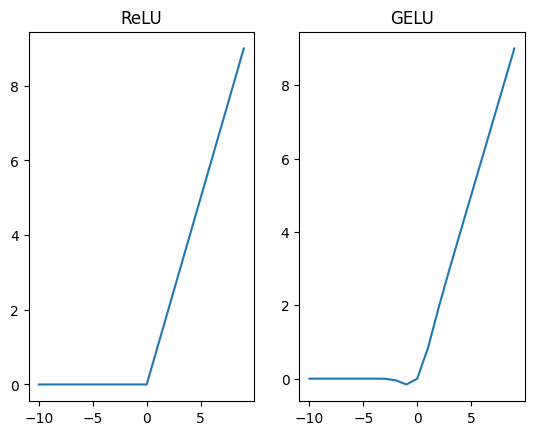

In [2]:
import torch
import math
import matplotlib.pyplot as plt

def plot_function(f, name=''):
    plt.plot(range(-10,10), [f(torch.tensor(x, dtype=torch.float32)).item() for x in range(-10,10)]) #f is used to plot the function
    plt.title(name)


class GELU(torch.nn.Module):
    def forward(self,x):
        return 0.5*x*(1+torch.tanh(math.sqrt(2/math.pi)*(x+0.044715*torch.pow(x,3))))

gelu=GELU()
    
# The plt.subplot(121) call is equivalent to plt.subplot(1, 2, 1). It specifies a grid of 1 row and 2 columns, and the subplot is placed in the first position (index 1) of the grid
plt.subplot(121)
plot_function(torch.relu, 'ReLU')
plt.subplot(122)
plot_function(gelu, 'GELU')